In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('/content/drive/MyDrive/CV/archive_flower.zip').extractall('/content/')

     |████████████████████████████████| 77 kB 4.4 MB/s 


In [ ]:
import numpy as np # this is for linear algebra
import pandas as pd # this is for data processing
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
import cv2

tf.config.experimental.list_physical_devices('GPU') 
import os
for dirname, _, filenames in os.walk('/content/flowers'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
# Check for available GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from PIL import Image        # for image processing
with tf.device('/GPU:0'):
    image_set = []
    label_set = []
    path = '/content/flowers'
    for flower_type in os.listdir(path):
        subpath = os.path.join(path, flower_type)
        for img in os.listdir(subpath):
            try:
                flower_pic = os.path.join(subpath,img)
                image = cv2.imread(flower_pic)
                image = cv2.resize(image, (224,224))
                image_set.append(image)
                label_set.append(flower_type)
            except Exception as e:    # To remove problematic pictures and prevent the program from encountering errors
                print(str(e))

In [ ]:
print(len(label_set))

4317


sunflower


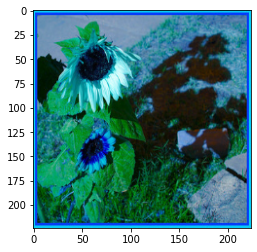

In [ ]:
print(label_set[2500])
plt.imshow(image_set[2500])

In [ ]:
image_set = np.array(image_set)
label_set = pd.Series(label_set)
image_set.shape

(4317, 224, 224, 3)

In [ ]:
label_set.shape

(4317,)

In [ ]:
label_set.head()

0    dandelion
1    dandelion
2    dandelion
3    dandelion
4    dandelion
dtype: object

In [ ]:
label_set.unique()

array(['dandelion', 'daisy', 'sunflower', 'rose', 'tulip'], dtype=object)

In [ ]:
label_set = label_set.map({'daisy':1, 'dandelion':2, 'rose':3, 'sunflower':4, 'tulip':5})
label_set.head()

0    2
1    2
2    2
3    2
4    2
dtype: int64

In [ ]:
label_set.unique()

array([2, 1, 4, 3, 5])

In [ ]:
label_set = pd.DataFrame(label_set) # to convert the shape (4317,) to (4317,1)
label_set.shape

(4317, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_set, label_set, test_size=0.2, random_state=37)
print("Length of x_train: ", len(x_train)) 
print("Length of y_train: ", len(y_train))
print("Length of x_test: ", len(x_test))
print("Length of y_test: ", len(y_test))

Length of x_train:  3453
Length of y_train:  3453
Length of x_test:  864
Length of y_test:  864


In [ ]:
#One vs all classification
label_binrizer = LabelBinarizer()
y_train = label_binrizer.fit_transform(y_train)

In [ ]:
image_set[0].shape

(224, 224, 3)

In [ ]:
def Alex_Net(images, labels):
    with tf.device(device_name):
        class myCallback(tf.keras.callbacks.Callback):        # interrupts the training when 99.9% is achieved
            def on_epoch_end(self, epoch, logs={}):
                if(float(logs.get('accuracy'))>0.995):
                    print("\nReached 99.9% accuracy so cancelling training!")
                    self.model.stop_training = True
                
        callbacks = myCallback()
        model = tf.keras.models.Sequential([
            # Layer 1
            tf.keras.layers.Conv2D(96,(11,11), strides=4, padding='same', activation=tf.nn.relu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(3,2),
            # Layer 2
            tf.keras.layers.Conv2D(256,(5,5), strides=2, padding='same', activation=tf.nn.relu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(3,2),
            # Layer 3
            tf.keras.layers.Conv2D(384,(3,3), strides=1, padding='same', activation=tf.nn.relu),
            # Layer 4
            tf.keras.layers.Conv2D(384,(3,3), strides=1, padding='same', activation=tf.nn.relu),
            # Layer 5
            tf.keras.layers.Conv2D(256,(3,3), strides=1, padding='same', activation=tf.nn.relu),
            tf.keras.layers.MaxPooling2D(3,2),

            # FC 1
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(4096, activation=tf.nn.relu),
            # FC 2
            tf.keras.layers.Dense(4096, activation=tf.nn.relu),
            # Softmax layer
            tf.keras.layers.Dense(5, activation=tf.nn.softmax)

        ])

        model.compile(keras.optimizers.Adam(learning_rate=0.0001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        hist = model.fit(images, labels, epochs=50, callbacks=[callbacks])
    return model

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = Alex_Net(x_train, y_train)

Epoch 1/50
108/108 [==============================] - 37s 79ms/step - loss: 1.2289 - accuracy: 0.4941
Epoch 2/50
108/108 [==============================] - 8s 71ms/step - loss: 0.9330 - accuracy: 0.6215
Epoch 3/50
108/108 [==============================] - 8s 72ms/step - loss: 0.8388 - accuracy: 0.6777
Epoch 4/50
108/108 [==============================] - 8s 71ms/step - loss: 0.7141 - accuracy: 0.7240
Epoch 5/50
108/108 [==============================] - 8s 72ms/step - loss: 0.6128 - accuracy: 0.7643
Epoch 6/50
108/108 [==============================] - 8s 72ms/step - loss: 0.5171 - accuracy: 0.8065
Epoch 7/50
108/108 [==============================] - 8s 72ms/step - loss: 0.4197 - accuracy: 0.8442
Epoch 8/50
108/108 [==============================] - 8s 72ms/step - loss: 0.3265 - accuracy: 0.8784
Epoch 9/50
108/108 [==============================] - 8s 72ms/step - loss: 0.3030 - accuracy: 0.8891
Epoch 10/50
108/108 [==============================] - 8s 73ms/step - loss: 0.2427 - accur

In [ ]:
model.save('/content/drive/MyDrive/CV/AlexNet.h5')

In [ ]:
model=keras.models.load_model("/content/drive/MyDrive/CV/AlexNet.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
# One vs all classification
y_test = label_binrizer.fit_transform(y_test)

In [ ]:
print('AlexNet test accuracy: ',accuracy_score(y_test, y_pred.round()))

AlexNet test accuracy:  0.7407407407407407
